In [10]:
library(dplyr)
library(ggplot2)
library(cowplot)
library(qvalue)

In [2]:
revision_folder = "/hps/nobackup/stegle/users/acuomo/all_scripts/struct_LMM2/sc_endodiff/debug_May2021/REVISION/"

In [3]:
crm_file = paste0(revision_folder, "Annas_results_all_common_eqtls.csv")
# crm_file = paste0(revision_folder,"Annas_results_all_common_eqtls_with_Bonferroni.csv")
crm = read.csv(crm_file, row.names=1)

In [4]:
crm_22 = crm[crm$chrom==22,]

In [5]:
head(crm_22)

,gene,n_snps,chrom,pv_raw,snpID,pv,eqtl
7476,ENSG00000100206,639,22,0.4846768,22_38815543_G_T,1,ENSG00000100206-22_38815543_G_T
7477,ENSG00000100206,639,22,0.5735132,22_38815767_C_T,1,ENSG00000100206-22_38815767_C_T
7478,ENSG00000100206,639,22,0.8756466,22_38816059_T_C,1,ENSG00000100206-22_38816059_T_C
7479,ENSG00000100206,639,22,0.1460246,22_38816351_G_A,1,ENSG00000100206-22_38816351_G_A
7480,ENSG00000100206,639,22,0.2546127,22_38817047_A_G,1,ENSG00000100206-22_38817047_A_G
7481,ENSG00000100206,639,22,0.1834585,22_38817105_C_T,1,ENSG00000100206-22_38817105_C_T


In [6]:
crm_22$fdr = p.adjust(crm_22$pv_raw, method = "BH")

In [7]:
crm_int_file = paste0(revision_folder, "CRM_interaction_chr22/results/summary.csv")
crm_int = read.csv(crm_int_file, row.names=1)
nrow(crm_int)
head(crm_int,2)

[1] 140564

,gene,n_snps,chrom,pv_raw,snpID
0,ENSG00000128159,10,22,0.64912024,22_50633048_T_G
1,ENSG00000128159,10,22,0.06923793,22_50633686_T_C


In [8]:
crm_int$fdr = p.adjust(crm_int$pv_raw, method = "BH")

In [14]:
df_join = inner_join(crm_22, crm_int, by=c("snpID","gene"), suffix=c(".assoc",".int"))

In [21]:
thresholds = seq(0, 1, length.out = 100)

In [27]:
df_plot = data.frame(assoc_FDR = thresholds, n_GxC=0, n_eGenes=0)

In [31]:
for (t in thresholds){
    res = df_join[df_join$fdr.assoc < t,]
    res$fdr = p.adjust(res$pv_raw.int, method = "BH")
    df_plot[df_plot$assoc_FDR == t,"n_GxC"] = nrow(res[res$fdr < 0.1,])
    df_plot[df_plot$assoc_FDR == t,"n_eGenes"] = length(unique(res[res$fdr < 0.1,"gene"]))
}

In [32]:
head(df_plot)

assoc_FDR,n_GxC,n_eGenes
0.00000000,0,0
0.01010101,1170,30
0.02020202,1216,33
0.03030303,1286,37
0.04040404,1306,38
0.05050505,1276,36


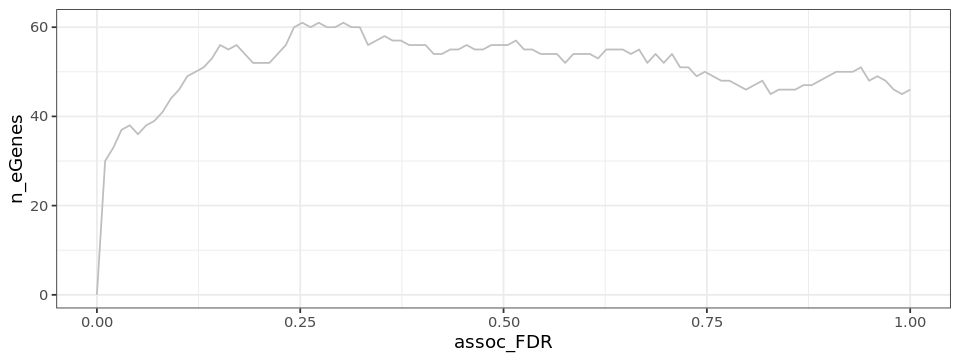

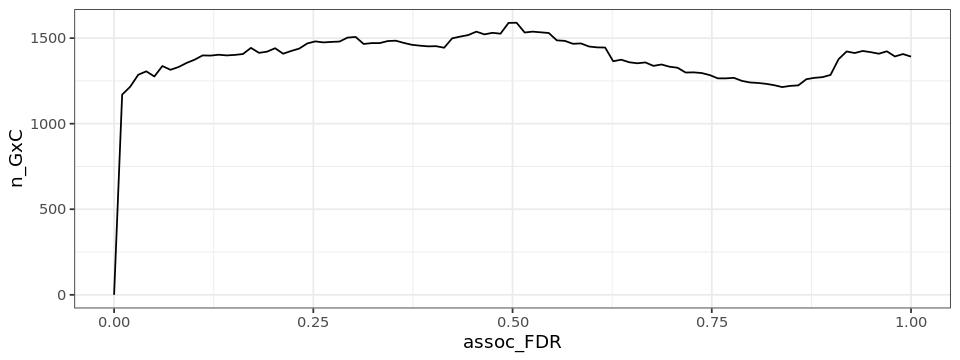

In [36]:
options(repr.plot.width = 8, repr.plot.height = 3) 
ggplot(df_plot, aes(x = assoc_FDR, y = n_eGenes)) + geom_line(col="grey") + theme_bw()
ggplot(df_plot, aes(x = assoc_FDR, y = n_GxC)) + geom_line() + theme_bw()